In [41]:
MERCHAINDISE = 'LTCUSDT'
DAYS = 30
START_DATE = '2021-9-7'
END_DATE = '2021-9-28'
    

In [ ]:
# Private function

def report_by_hour(hour): 
    hour_observe = hour
    type_continuous_str = f"type_continuous_{hour_observe}"

    data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
    data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

    print(f"Giờ {hour_observe}")
    print("________________________________")
    print(data_prices_up['hour_return'].describe())
    print(data_prices_up['hour_return'].sum())


    print("+++")
    print(data_prices_down['hour_return'].describe())
    print(data_prices_down['hour_return'].sum())

    data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


    print('____________________________________________________________')

    data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


    data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

    type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

    labels = type_continuous_group.index.values
    sizes = type_continuous_group.values

    plt.figure()
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.legend()
    plt.show()

    print(type_continuous_group)

In [ ]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()


data_prices_up = data_prices[data_prices['type'] == 'up']
data_prices_down = data_prices[data_prices['type'] == 'down']

print("______________________________Hour return____________________________")

print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())


print("______________________________Loại tiếp diễn____________________________")

type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()


print("______________________________Thời gian biến động nhất____________________________")


def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()


list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()


Giờ 1
________________________________
count    16.000000
mean      0.670488
std       0.777660
min       0.000000
25%       0.239797
50%       0.360068
75%       0.789008
max       3.177756
Name: hour_return, dtype: float64
10.727810141722331
+++
count    14.000000
mean     -0.676015
std       0.472377
min      -1.477651
25%      -1.011639
50%      -0.647387
75%      -0.254403
max      -0.051203
Name: hour_return, dtype: float64
-9.464215471434496
____________________________________________________________


<ipython-input-41-8c958a8a976c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


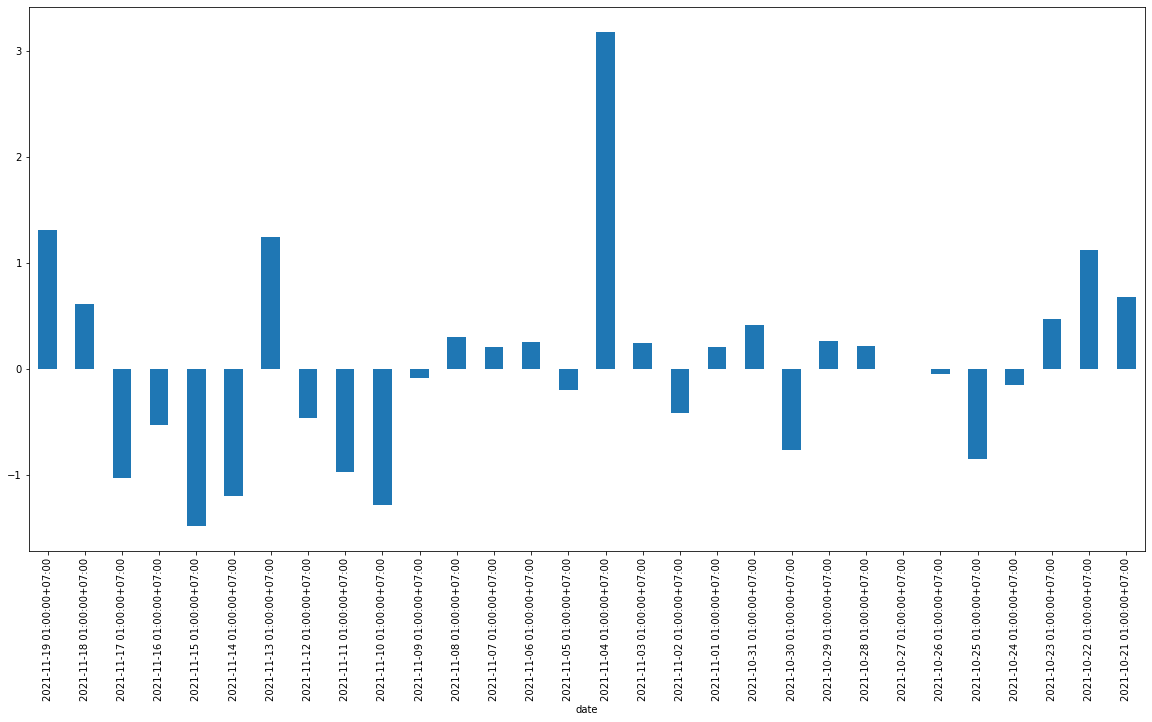

<Figure size 720x720 with 0 Axes>

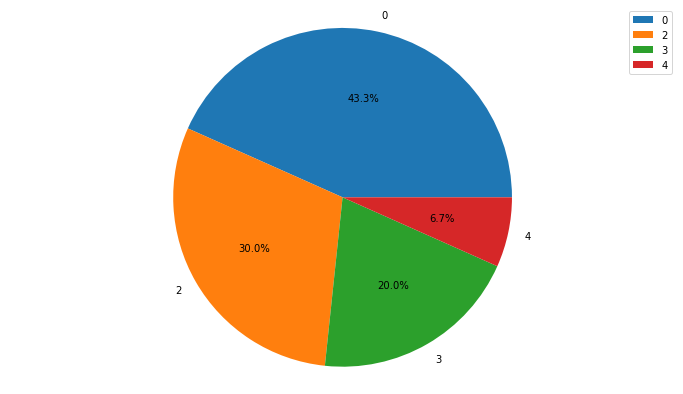

type_continuous_1
0    13
2     9
3     6
4     2
dtype: int64


In [42]:
hour_observe = 1
report_by_hour(hour_observe)


In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)

In [ ]:
hour_observe = 1
type_continuous_str = f"type_continuous_{hour_observe}"

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


print('____________________________________________________________')

data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)